In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
accident_data_to_load = "../data/outTX.csv"

tx_accident_data = pd.read_csv(accident_data_to_load)
tx_accident_data.drop("Unnamed: 0", axis=1, inplace=True)

In [8]:
tx_accident_data

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,m_start,m_end,s_start,s_end,sec_start,sec_end,duration,season_start,season_end,day_of_week
0,A-267712,MapQuest,201.0,2,2017-01-02 14:40:12,2017-01-02 15:39:53,30.393579,-97.745979,NaN,NaN,...,40,39,12,53,52812,56393,3581,winter,1,Monday
1,A-267713,MapQuest,201.0,2,2017-01-02 14:28:48,2017-01-02 15:28:36,30.256216,-97.722038,NaN,NaN,...,28,28,48,36,52128,55716,3588,winter,1,Monday
2,A-267714,MapQuest,201.0,2,2017-01-02 14:04:17,2017-01-02 15:05:00,30.418287,-97.700874,NaN,NaN,...,4,5,17,0,50657,54300,3643,winter,1,Monday
3,A-267715,MapQuest,201.0,2,2017-01-02 14:29:13,2017-01-02 15:35:00,30.237938,-97.696167,NaN,NaN,...,29,35,13,0,52153,56100,3947,winter,1,Monday
4,A-267716,MapQuest,201.0,2,2017-01-02 14:40:51,2017-01-02 15:40:23,30.364882,-97.695992,NaN,NaN,...,40,40,51,23,52851,56423,3572,winter,1,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248293,A-3513513,Bing,NaN,2,2019-08-23 13:16:19,2019-08-23 13:45:28,29.749589,-95.456110,29.742630,-95.457930,...,16,45,19,28,47779,49528,1749,summer,8,Friday
248294,A-3513514,Bing,NaN,3,2019-08-23 13:04:19,2019-08-23 13:33:52,29.778089,-95.373146,29.774183,-95.368235,...,4,33,19,52,47059,48832,1773,summer,8,Friday
248295,A-3513515,Bing,NaN,3,2019-08-23 13:00:34,2019-08-23 13:30:14,29.774190,-95.320940,29.774180,-95.312270,...,0,30,34,14,46834,48614,1780,summer,8,Friday
248296,A-3513517,Bing,NaN,3,2019-08-23 16:44:23,2019-08-23 17:11:49,29.941686,-95.295187,29.926120,-95.302110,...,44,11,23,49,60263,61909,1646,summer,8,Friday


In [3]:
for col in tx_accident_data.columns: 
    print(col) 

Unnamed: 0
ID
Source
TMC
Severity
Start_Time
End_Time
Start_Lat
Start_Lng
End_Lat
End_Lng
Distance(mi)
Description
Number
Street
Side
City
County
State
Zipcode
Country
Timezone
Airport_Code
Weather_Timestamp
Temperature(F)
Wind_Chill(F)
Humidity(%)
Pressure(in)
Visibility(mi)
Wind_Direction
Wind_Speed(mph)
Precipitation(in)
Weather_Condition
Amenity
Bump
Crossing
Give_Way
Junction
No_Exit
Railway
Roundabout
Station
Stop
Traffic_Calming
Traffic_Signal
Turning_Loop
Sunrise_Sunset
Civil_Twilight
Nautical_Twilight
Astronomical_Twilight
Year
start
end
tss
tse
year_start
year_end
month_start
month_end
day_start
day_end
time_start
time_end
h_start
h_end
m_start
m_end
s_start
s_end
sec_start
sec_end
duration
season_start
season_end
day_of_week


In [4]:
# # filter to texas only
# tx_accident_data = us_accident_data[(us_accident_data["State"] == "TX")]
# tx_accident_data.tail()

In [5]:
# filter to columns for amenity analysis

amenity_data = tx_accident_data[["ID", "TMC", "Severity", "Number", "Street", "City", "County", "State", "Zipcode", "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop", "year_start"]]
amenity_data

,ID,TMC,Severity,Number,Street,City,County,State,Zipcode,Bump,...,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,year_start
0,A-267712,201.0,2,10191.0,Research Blvd,Austin,Travis,TX,78759-5803,False,...,False,False,False,False,False,False,False,False,False,2017
1,A-267713,201.0,2,2040.0,E Cesar Chavez St,Austin,Travis,TX,78702-4564,False,...,False,False,False,False,False,False,False,False,False,2017
2,A-267714,201.0,2,12498.0,Tomanet Trl,Austin,Travis,TX,78758-2412,False,...,False,False,False,False,False,False,False,False,False,2017
3,A-267715,201.0,2,6203.0,Ponca St,Austin,Travis,TX,78741,False,...,False,False,False,False,False,False,False,False,False,2017
4,A-267716,201.0,2,9515.0,N Lamar Blvd,Austin,Travis,TX,78753-4107,False,...,False,False,False,False,False,False,False,True,False,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248293,A-3513513,NaN,2,NaN,I-610 S,Houston,Harris,TX,77027,False,...,False,False,False,False,False,False,False,False,False,2019
248294,A-3513514,NaN,3,NaN,I-10 E,Houston,Harris,TX,77007,False,...,False,False,False,False,False,False,False,False,False,2019
248295,A-3513515,NaN,3,NaN,US-90 E,Houston,Harris,TX,77020,False,...,False,False,False,False,False,False,False,False,False,2019
248296,A-3513517,NaN,3,NaN,US-59 N,Humble,Harris,TX,77396,False,...,False,False,False,False,False,False,False,False,False,2019


In [6]:
isolated_amenity_data = tx_accident_data[[ "Bump", "Crossing", "Give_Way", "Junction", "No_Exit", "Railway", "Roundabout", "Station", "Stop", "Traffic_Calming", "Traffic_Signal", "Turning_Loop"]]
isolated_amenity_data

,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
248293,False,False,False,False,False,False,False,False,False,False,False,False
248294,False,False,False,False,False,False,False,False,False,False,False,False
248295,False,False,False,False,False,False,False,False,False,False,False,False
248296,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
clean_isolated_amenity_data = isolated_amenity_data.dropna()

In [8]:
# get number of accidents in TX
total_accidents = len(clean_isolated_amenity_data)

# find % of accidents at amenities
pct_bump = (clean_isolated_amenity_data.Bump.sum() / total_accidents) * 100
pct_crossing = (clean_isolated_amenity_data.Crossing.sum() / total_accidents) * 100
pct_giveway = (clean_isolated_amenity_data.Give_Way.sum() / total_accidents) * 100
pct_junction = (clean_isolated_amenity_data.Junction.sum() / total_accidents) * 100
pct_no_exit = (clean_isolated_amenity_data.No_Exit.sum() / total_accidents) * 100
pct_railway = (clean_isolated_amenity_data.Railway.sum() / total_accidents) * 100
pct_roundabout = (clean_isolated_amenity_data.Roundabout.sum() / total_accidents) * 100
pct_station = (clean_isolated_amenity_data.Station.sum() / total_accidents) * 100
pct_stop = (clean_isolated_amenity_data.Stop.sum() / total_accidents) * 100
pct_traffic_calming = (clean_isolated_amenity_data.Traffic_Calming.sum() / total_accidents) * 100
pct_traffic_signal = (clean_isolated_amenity_data.Traffic_Signal.sum() / total_accidents) * 100
# #pct_turning_loop = (ammenity_data[True] / total_accidents) * 100 # all false

print(f"The % of accidents at bumps is: " + str(pct_bump) + "%")
print(f"The % of accidents at crossings is: " + str(pct_crossing) + "%")
print(f"The % of accidents at give-ways is: " + str(pct_giveway) + "%")
print(f"The % of accidents at junctions is: " + str(pct_junction) + "%")
print(f"The % of accidents at no exits is: " + str(pct_no_exit) + "%")
print(f"The % of accidents at railways is: " + str(pct_railway) + "%")
print(f"The % of accidents at roundabouts is: " + str(pct_roundabout) + "%")
print(f"The % of accidents at rail stations is: " + str(pct_station) + "%")
print(f"The % of accidents at stop signs is: " + str(pct_stop) + "%")
print(f"The % of accidents at traffic calming amenities is: " + str(pct_traffic_calming) + "%")
print(f"The % of accidents at traffic signals is: " + str(pct_traffic_signal) + "%")
print(f"The % of accidents at turning loops is: 0%")


The % of accidents at bumps is: 0.016915158398376144%
The % of accidents at crossings is: 7.736268516057318%
The % of accidents at give-ways is: 0.6109594116746813%
The % of accidents at junctions is: 5.13375057390716%
The % of accidents at no exits is: 0.11598965758886501%
The % of accidents at railways is: 0.9633585449741843%
The % of accidents at roundabouts is: 0.004430160532908038%
The % of accidents at rail stations is: 1.519142320920829%
The % of accidents at stop signs is: 1.875568872886612%
The % of accidents at traffic calming amenities is: 0.037857735463032324%
The % of accidents at traffic signals is: 28.903575542291925%
The % of accidents at turning loops is: 0%


In [ ]:
most_common_amenities_related_to_accidents

In [10]:
# bar chart to show distribution of amenities

counts = tx_accident_data['Drug Regimen'].value_counts()

x_axis = np.arange(len(counts))

plt.bar(x_axis, counts, width = 0.7, zorder=3)

# ticks
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)

plt.xticks(rotation=90)

# labels
plt.xlabel("Treatment")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points for Each Treatment")

plt.show()

In [16]:
#severity data
### compare severity with amenity via scatter plot ###

severity_data = tx_accident_data[["Severity", "Crossing", "Junction", "Station", "Stop", "Traffic_Signal"]]
severity_data

,Severity,Crossing,Junction,Station,Stop,Traffic_Signal
0,2,False,False,False,False,False
1,2,False,False,False,False,False
2,2,False,False,False,False,False
3,2,False,False,False,False,False
4,2,False,False,False,False,True
...,...,...,...,...,...,...
248293,2,False,False,False,False,False
248294,3,False,False,False,False,False
248295,3,False,False,False,False,False
248296,3,False,False,False,False,False


In [19]:
grouped_by_severity_data = severity_data.groupby(["Severity"]).size()
grouped_by_severity_data

Severity
1        97
2    178016
3     67184
4      3001
dtype: int64

In [21]:
severity_1 = grouped_by_severity_data(grouped_by_severity_data[1] == 
severity_1
                                      
us_accident_data[(us_accident_data["State"] == "TX")]

97

In [12]:
#severity_1 = severity_data[1]

#ninth_graders = school_data_complete[(school_data_complete["grade"] == "9th")]

In [13]:
#time of day data
time_of_day_data = tx_accident_data[["Sunrise_Sunset", "Civil_Twilight", "Nautical_Twilight", "Astronomical_Twilight"]]
time_of_day_data

,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,Day,Day,Day,Day
1,Day,Day,Day,Day
2,Day,Day,Day,Day
3,Day,Day,Day,Day
4,Day,Day,Day,Day
...,...,...,...,...
248293,Day,Day,Day,Day
248294,Day,Day,Day,Day
248295,Day,Day,Day,Day
248296,Day,Day,Day,Day


In [14]:
# percent of accidents happening at day and night
sunrise_sunset = time_of_day_data.groupby(["Sunrise_Sunset"]).size()
civil_twilight = time_of_day_data.groupby(["Civil_Twilight"]).size()
nautical_twilight = time_of_day_data.groupby(["Nautical_Twilight"]).size()
astronomical_twilight = time_of_day_data.groupby(["Astronomical_Twilight"]).size()

pct_sunrise_sunset_day = (sunrise_sunset["Day"] / total_accidents) * 100
pct_sunrise_sunset_night = (sunrise_sunset["Night"] / total_accidents) * 100

pct_civil_twilight_day = (civil_twilight["Day"] / total_accidents) * 100
pct_civil_twilight_night = (civil_twilight["Night"] / total_accidents) * 100

pct_nautical_twilight_day = (nautical_twilight["Day"] / total_accidents) * 100
pct_nautical_twilight_night = (nautical_twilight["Night"] / total_accidents) * 100

pct_astronomical_twilight_day = (astronomical_twilight["Day"] / total_accidents) * 100
pct_astronomical_twilight_night = (astronomical_twilight["Night"] / total_accidents) * 100

print(f"Percent of accidents during the Day: " + str(pct_sunrise_sunset_day) + "%")
print(f"Percent of accidents at Night: " + str(pct_sunrise_sunset_night) + "%" + "\n")
print(f"Percent of accidents during Civil Twilight Day: " + str(pct_civil_twilight_day) + "%")
print(f"Percent of accidents at Civil Twilight Night: " + str(pct_civil_twilight_night) + "%" + "\n")
print(f"Percent of accidents during the Nautical Twilight Day: " + str(pct_nautical_twilight_day) + "%")
print(f"Percent of accidents at Nautical Twilight Night: " + str(pct_nautical_twilight_night) + "%" + "\n")
print(f"Percent of accidents during the Astronomical Day: " + str(pct_astronomical_twilight_day) + "%")
print(f"Percent of accidents at Astronomical Night: " + str(pct_astronomical_twilight_night) + "%" + "\n")

Percent of accidents during the Day: 77.77549557386688%
Percent of accidents at Night: 22.224504426133116%

Percent of accidents during Civil Twilight Day: 82.66437909286421%
Percent of accidents at Civil Twilight Night: 17.33562090713578%

Percent of accidents during the Nautical Twilight Day: 87.14166042416774%
Percent of accidents at Nautical Twilight Night: 12.858339575832268%

Percent of accidents during the Astronomical Day: 90.49166727077946%
Percent of accidents at Astronomical Night: 9.508332729220534%



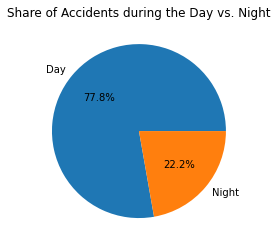

In [24]:
## pie chart for day vs. night share of accidents

accidents_sunlight = time_of_day_data['Sunrise_Sunset'].value_counts()

plt.pie(accidents_sunlight, labels=accidents_sunlight.index.values, autopct="%1.1f%%")
plt.title('Share of Accidents during the Day vs. Night')

plt.show()